In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score 


In [4]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [6]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_dataset.shape

(768, 9)

In [9]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### 0--> Non-Diabetic
### 1--> Diabetic

In [13]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [15]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [16]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Data Standardization

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X)

StandardScaler()

In [19]:
standardized_data = scaler.transform(X)

In [21]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
X = standardized_data

In [23]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y,random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### Training the Modle

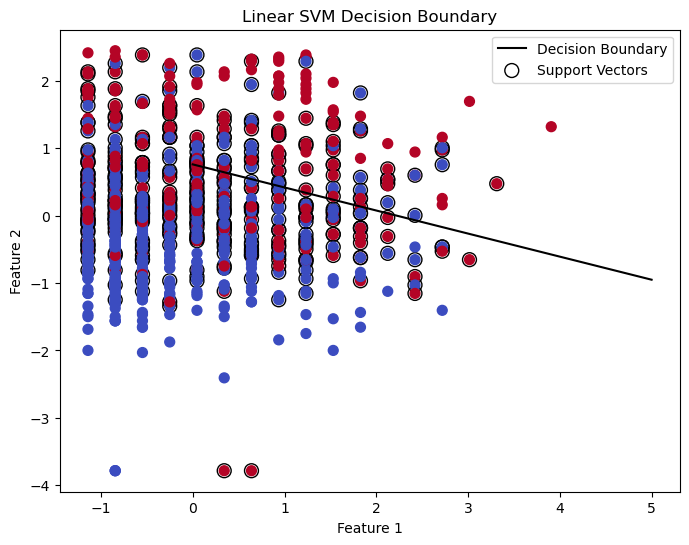

In [43]:
import matplotlib.pyplot as plt
classifier = svm.SVC(kernel='linear')
classifier.fit(X, Y)
w = classifier.coef_[0]  # Coefficients of the hyperplane
slope = -w[0] / w[1]     # Slope of the decision boundary
intercept = -classifier.intercept_[0] / w[1]  # Y-intercept

# Step 4: Plot the decision boundary
x_vals = np.linspace(0, 5, 100)
y_vals = slope * x_vals + intercept

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')

# Step 5: Plot the support vectors
plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Step 6: Plot the dataset points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Linear SVM Decision Boundary')

plt.show()

### Training the support vector Machine classifier

In [27]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

### Model evaluation

#### accuracy score on the training data

In [29]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [30]:
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.7866449511400652


In [32]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [33]:
print('Accuracy score of the training data:',test_data_accuracy)

Accuracy score of the training data: 0.7727272727272727


### Making predcitive System

In [42]:
input_data = (2,197,70,45,543,30.5,0.158,53)

# changing teh input data to input array
input_data_as_numpy = np.asarray(input_data)

#reshape the array we are predicting for one instance 
input_data_reshape = input_data_as_numpy.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshape)
print(std_data)


prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("the person in not diabetic")
else:
    print("the person is diabetic")

[[-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]]
[1]
the person is diabetic


/home/yusuf/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
